In [1]:
#draw_heatmap.r              20.01.20
#hur.benjamin@mayo.edu
#
#[1] Draw heatmap from given list
#[2] Designed to run this script i x j times (i = input matrix from DESeq2 results, j = predefined gene list)
#
#Memo: Drawing heatmap in case of "TREE CUT"
#
#cmd: Rscript draw_heatmap.r [input deg matrix] [input predefined gene list] [output prefix]
 
library(gplots)
library(pheatmap)
library(RColorBrewer)

#for cut-tree, currently not in use
#library(dendextend)


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Klk6,14379.84137,-14.2509475,0.4847683,-29.397441,5.921327e-190,1.230985e-185
2310002F09Rik,32.57257,-5.2321334,0.4952366,-10.564917,4.333510e-26,4.504467e-22
Klk10,13.29083,-3.7360551,0.6489262,-5.757289,8.547575e-09,5.923185e-05
Arl4d,3382.79179,0.9715219,0.1853810,5.240678,1.599874e-07,8.314947e-04
Arrdc2,4819.64819,0.7857352,0.1629363,4.822345,1.418803e-06,5.899099e-03
Wdfy1,4087.46473,-0.7103650,0.1521872,-4.667707,3.045804e-06,1.055320e-02


,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Serpina3n,7588.43158,0.14376614,0.05305912,2.7095461,0.006737534,0.9996349
Hspb1,3511.60681,0.18066900,0.10457602,1.7276331,0.084054023,0.9996349
Cd44,1759.13558,-0.16122087,0.16212648,-0.9944141,0.320021285,0.9996349
Cp,1163.70360,-0.06833311,0.07178591,-0.9519014,0.341147002,0.9996349
Vim,10442.72078,0.10709871,0.11599093,0.9233370,0.355831613,0.9996349
Timp1,79.96613,-0.19240168,0.23423117,-0.8214179,0.411408262,0.9996349
Gfap,270006.01857,0.08566135,0.13986750,0.6124464,0.540242437,0.9996349
Cxcl10,80.25257,-0.17118948,0.28513873,-0.6003726,0.548257936,0.9996349
S1pr3,534.17206,0.07188018,0.13119693,0.5478800,0.583774277,0.9996349


 [1] "Serpina3n_101" "Hspb1_010"     "Cd44_011"      "Cp_010"       
 [5] "Vim_010"       "Timp1_000"     "Gfap_011"      "Cxcl10_000"   
 [9] "S1pr3_001"     "Aspg_000"      "Lcn2_001"      "Osmr_000"     
[13] "Steap4_000"   
 [1] "Serpina3n" "Hspb1"     "Cd44"      "Cp"        "Vim"       "Timp1"    
 [7] "Gfap"      "Cxcl10"    "S1pr3"     "Aspg"      "Lcn2"      "Osmr"     
[13] "Steap4"   


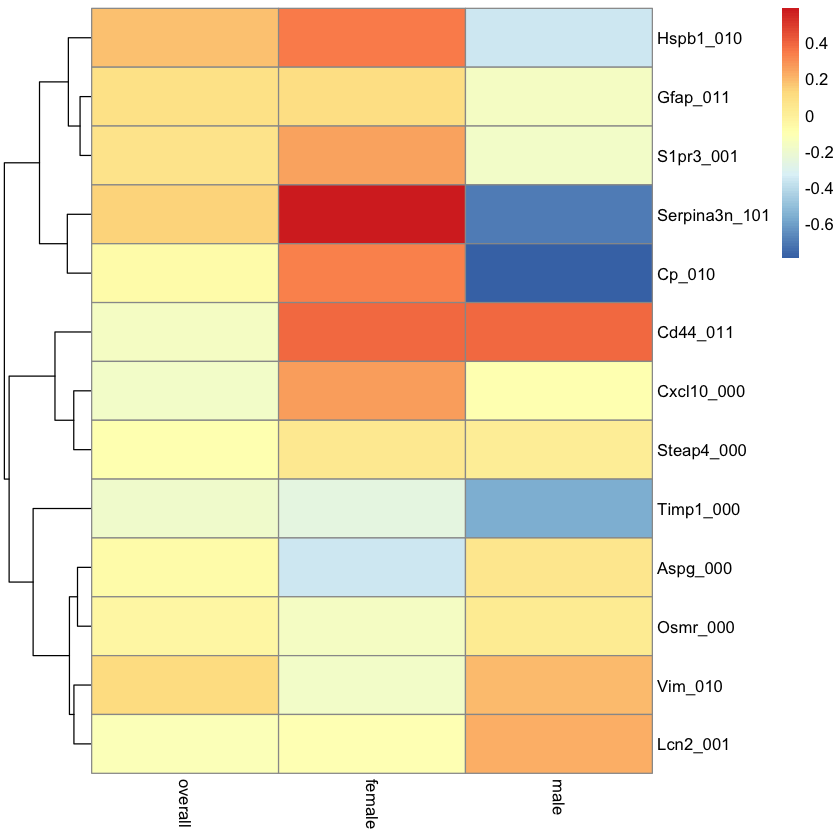

In [43]:
#test dataset
deg_data_matrix <- '/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.overall.deg.tsv'
deg_data_f_matrix <- '/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.male.deg.tsv'
deg_data_m_matrix <- '/Users/m221138/Scarisbrick_Project/RNAseq/deseq2/klk6.female.deg.tsv'

predefined_gene_list <- '/Users/m221138/Scarisbrick_Project/RNAseq/analysis/astrocyte.pan.list'

deg_df <-read.csv(deg_data_matrix, sep=",", header=TRUE, row.names=1)
deg_f_df <-read.csv(deg_data_f_matrix, sep=",", header=TRUE, row.names=1)
deg_m_df <-read.csv(deg_data_m_matrix, sep=",", header=TRUE, row.names=1)

deg_df <- as.data.frame(deg_df)


head(deg_df)
predefined_gene_list <- read.csv(predefined_gene_list, header=FALSE)$V1
predefined_gene_list <- as.character(predefined_gene_list)

#print (predefined_gene_list)

subset_df <- subset(deg_df, rownames(deg_df) %in% predefined_gene_list)
subset_f_df <- subset(deg_f_df, rownames(deg_f_df) %in% predefined_gene_list)
subset_m_df <- subset(deg_m_df, rownames(deg_m_df) %in% predefined_gene_list)


heatmap_ready_df <- data.frame(overall= subset_df$log2FoldChange, 
                               female=subset_f_df$log2FoldChange,
                               male=subset_m_df$log2FoldChange)
rownames(heatmap_ready_df) <- row.names(subset_df)

subset_df
pvalue_cutline <- 0.05

gene_name_with_barcode_list <- c()
for (gene_name in row.names(subset_df))
{
    barcode_list <- c(0,0,0)
    subset_df_pval <- subset_df[gene_name,"pvalue"]
    subset_f_df_pval <- subset_f_df[gene_name,"pvalue"]
    subset_m_df_pval <- subset_m_df[gene_name,"pvalue"]
    if (subset_df_pval < pvalue_cutline)
    {
        barcode_list[1] <- 1
    }   
    if (subset_f_df_pval < pvalue_cutline)
    {
        barcode_list[2] <- 1
    }        
    if (subset_m_df_pval < pvalue_cutline)
    {
        barcode_list[3] <- 1
    }

#     print (gene_name)
#     print (barcode_list)
    gene_name_with_barcode <- paste(gene_name,'_', barcode_list[1], barcode_list[2],barcode_list[3],sep="")
    #print (gene_name_with_barcode)
    gene_name_with_barcode_list <- c(gene_name_with_barcode_list, gene_name_with_barcode)
}

print (gene_name_with_barcode_list)
print (row.names(heatmap_ready_df))

rownames(heatmap_ready_df) <- gene_name_with_barcode_list
heatmap_ready_df <- as.matrix(heatmap_ready_df)

my_palette <- colorRampPalette(c("green", "black", "red"))(n = 50)

#hclust.average <- function(x) hclust(x, method="average")
# heatmap_results <- heatmap.2(heatmap_ready_df, hclustfun=hclust.average, 
#                              col=my_palette, 
#                              symm=F, symkey=F, symbreak=F, trace="none")

pheatmap_results <- pheatmap(heatmap_ready_df, cluster_cols=FALSE)